###Brian Huang

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from SVM import SVM
from Kernel import Kernel

#This function plots
def plot(predictor, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

#This piece of code generates random data points
num_samples = 500
num_features = 2
grid_size = 20
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                    .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

     pcost       dcost       gap    pres   dres
 0: -1.8669e+02 -1.5828e+03  1e+04  4e+00  8e-15
 1: -1.1306e+02 -1.1163e+03  2e+03  6e-01  7e-15
 2: -6.7190e+01 -3.6674e+02  5e+02  1e-01  7e-15
 3: -5.0191e+01 -1.0680e+02  8e+01  2e-02  5e-15
 4: -5.5249e+01 -6.9216e+01  2e+01  3e-03  5e-15
 5: -5.6679e+01 -6.3792e+01  9e+00  1e-03  4e-15
 6: -5.7575e+01 -6.1448e+01  5e+00  6e-04  4e-15
 7: -5.8172e+01 -6.0054e+01  2e+00  2e-04  4e-15
 8: -5.8621e+01 -5.9286e+01  7e-01  6e-05  4e-15
 9: -5.8875e+01 -5.8896e+01  2e-02  3e-07  5e-15
10: -5.8885e+01 -5.8885e+01  2e-04  4e-09  5e-15
11: -5.8885e+01 -5.8885e+01  2e-06  4e-11  5e-15
Optimal solution found.


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


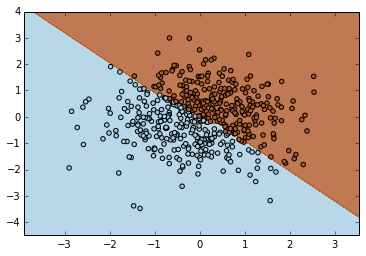

In [2]:
#Linear Kernel
model = SVM(1., Kernel.linear())
model.fit(samples,labels)
plot(model, samples, labels, grid_size)

     pcost       dcost       gap    pres   dres
 0: -1.5068e+02 -1.0121e+03  4e+03  2e+00  3e-15
 1: -9.7297e+01 -6.2320e+02  9e+02  3e-01  2e-15
 2: -8.1948e+01 -1.6514e+02  9e+01  2e-02  3e-15
 3: -1.0596e+02 -1.3094e+02  3e+01  4e-03  2e-15
 4: -1.1203e+02 -1.2446e+02  1e+01  2e-03  2e-15
 5: -1.1475e+02 -1.2135e+02  7e+00  7e-04  2e-15
 6: -1.1667e+02 -1.1904e+02  2e+00  2e-04  3e-15
 7: -1.1747e+02 -1.1815e+02  7e-01  3e-05  3e-15
 8: -1.1778e+02 -1.1781e+02  3e-02  9e-07  3e-15
 9: -1.1779e+02 -1.1779e+02  5e-04  2e-08  3e-15
10: -1.1779e+02 -1.1779e+02  5e-06  2e-10  3e-15
Optimal solution found.


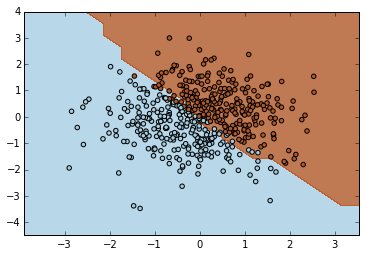

In [3]:
#Gaussian Kernel
model = SVM(1., Kernel.gaussian(3))
model.fit(samples,labels)
plot(model, samples, labels, grid_size)

     pcost       dcost       gap    pres   dres
 0: -1.0220e+02 -1.0054e+03  5e+03  3e+00  1e-11
 1: -7.4416e+01 -6.6725e+02  2e+03  7e-01  6e-12
 2: -4.9304e+01 -4.3009e+02  7e+02  2e-01  5e-12
 3: -3.8607e+01 -1.4848e+02  2e+02  6e-02  3e-12
 4: -3.3807e+01 -8.7820e+01  1e+02  3e-02  2e-12
 5: -3.1561e+01 -5.8087e+01  5e+01  1e-02  1e-12
 6: -3.0457e+01 -4.3361e+01  3e+01  6e-03  5e-13
 7: -2.9740e+01 -4.2344e+01  2e+01  5e-03  3e-13
 8: -2.7767e+01 -3.9432e+01  2e+01  4e-03  3e-13
 9: -2.6350e+01 -3.5497e+01  1e+01  2e-03  3e-13
10: -2.6439e+01 -3.2072e+01  9e+00  1e-03  1e-13
11: -2.6136e+01 -3.1055e+01  8e+00  7e-04  1e-13
12: -2.6385e+01 -2.8252e+01  3e+00  2e-04  1e-13
13: -2.6474e+01 -2.7348e+01  1e+00  9e-05  1e-13
14: -2.6452e+01 -2.7063e+01  8e-01  4e-05  1e-13
15: -2.6593e+01 -2.6633e+01  5e-02  2e-06  1e-13
16: -2.6606e+01 -2.6606e+01  1e-03  4e-08  1e-13
17: -2.6606e+01 -2.6606e+01  1e-04  4e-09  1e-13
18: -2.6606e+01 -2.6606e+01  2e-06  4e-11  1e-13
Optimal solution foun

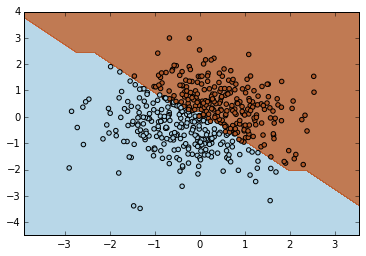

In [4]:
#inhomogenous_polynomial
model = SVM(1., Kernel.inhomogenous_polynomial(5))
model.fit(samples,labels)
plot(model, samples, labels, grid_size)

     pcost       dcost       gap    pres   dres
 0: -4.4659e+02 -1.5867e+03  7e+03  3e+00  2e-11
 1: -3.3057e+02 -1.3392e+03  3e+03  1e+00  1e-11
 2: -2.9069e+02 -1.1029e+03  2e+03  5e-01  1e-11
 3: -2.7557e+02 -8.3029e+02  9e+02  3e-01  7e-12
 4: -2.6266e+02 -6.1306e+02  6e+02  2e-01  5e-12
 5: -2.5150e+02 -4.2866e+02  3e+02  8e-02  3e-12
 6: -2.3955e+02 -3.5880e+02  3e+02  5e-02  2e-12
 7: -2.3124e+02 -2.9947e+02  2e+02  4e-02  1e-12
 8: -2.2149e+02 -2.5992e+02  1e+02  3e-02  7e-13
 9: -2.0982e+02 -2.3807e+02  1e+02  2e-02  8e-13
10: -2.0142e+02 -2.1783e+02  1e+02  2e-02  6e-13
11: -1.9362e+02 -2.0657e+02  1e+02  1e-02  5e-13
12: -1.8637e+02 -1.9526e+02  1e+02  1e-02  5e-13
13: -1.8009e+02 -1.8503e+02  9e+01  9e-03  3e-13
14: -1.7423e+02 -1.7629e+02  9e+01  8e-03  3e-13
15: -1.6577e+02 -1.6911e+02  8e+01  7e-03  3e-13
16: -1.5930e+02 -1.6364e+02  7e+01  6e-03  2e-13
17: -1.5183e+02 -1.5769e+02  7e+01  4e-03  2e-13
18: -1.4578e+02 -1.5141e+02  6e+01  3e-03  3e-13
19: -1.4160e+02 -1.48

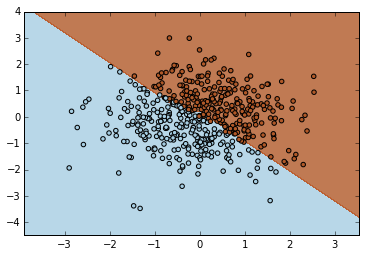

In [5]:
#homogenous polynomial
model = SVM(1., Kernel.homogenous_polynomial(5))
model.fit(samples,labels)
plot(model, samples, labels, grid_size)

     pcost       dcost       gap    pres   dres
 0: -2.1468e+02 -1.3253e+03  6e+03  3e+00  7e-16
 1: -1.4848e+02 -8.9927e+02  8e+02  2e-02  7e-16
 2: -1.8372e+02 -2.6697e+02  8e+01  2e-03  6e-16
 3: -2.2668e+02 -2.4133e+02  1e+01  3e-04  5e-16
 4: -2.3413e+02 -2.3681e+02  3e+00  5e-05  5e-16
 5: -2.3519e+02 -2.3605e+02  9e-01  1e-05  5e-16
 6: -2.3554e+02 -2.3579e+02  2e-01  3e-06  5e-16
 7: -2.3564e+02 -2.3570e+02  6e-02  6e-07  5e-16
 8: -2.3567e+02 -2.3568e+02  3e-03  2e-08  6e-16
 9: -2.3568e+02 -2.3568e+02  8e-05  5e-10  5e-16
Optimal solution found.


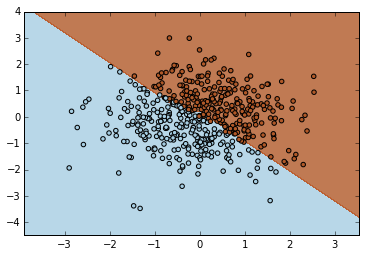

In [6]:
#Hyper_tangent
model = SVM(1., Kernel.hyperbolic_tangent(0.01, 0.02))
model.fit(samples,labels)
plot(model, samples, labels, grid_size)